In [83]:
import pandas as pd
import numpy as np
import numpy as np
from numpy import sqrt,mean,log,diff
import csv
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.api import graphics
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
%matplotlib inline
import scipy as sp
import random as rn
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

In [2]:
df= pd.read_csv('complete.csv',na_values=True)
df.head(2)

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,Density,latitude,longitude,oa11cd,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID
0,AB10 1BA,2008-12-08,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,08/12/2008,82990,82990,82990,...,12.0,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0
1,AB10 1BA,2006-06-13,Private Limited Company,Active,Private Limited Company,Active,13/06/2006,58142,58142,58142,...,12.0,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0


In [13]:
df.shape

(815302, 27)

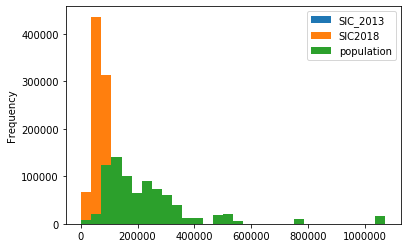

In [17]:
pop_1= df[['SIC_2013','SIC2018','population']]
hist = pop_1.plot.hist(bins=30)

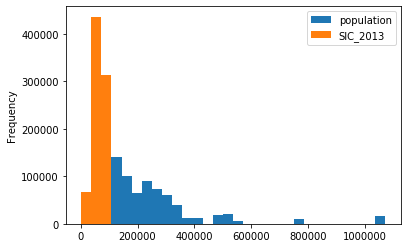

In [19]:
pop_2 = df[['population','SIC_2013']]
hist = pop_2.plot.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116478208>]],
      dtype=object)

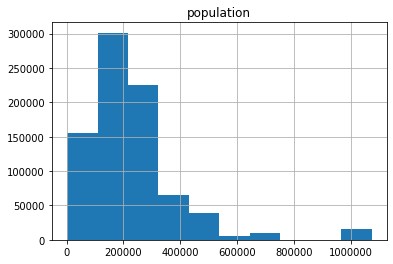

In [20]:
df.hist(column='population')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c30a20>]],
      dtype=object)

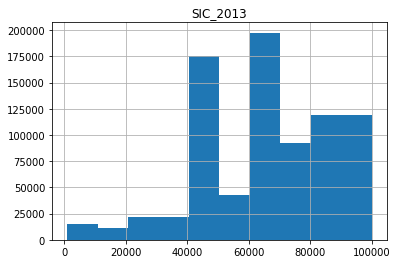

In [21]:
df.hist(column='SIC_2013')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125bfec50>]],
      dtype=object)

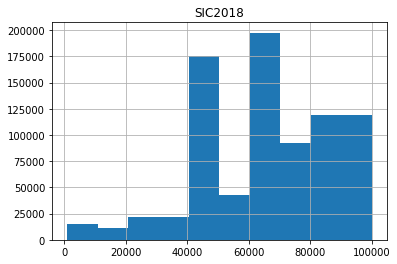

In [22]:
df.hist(column='SIC2018')

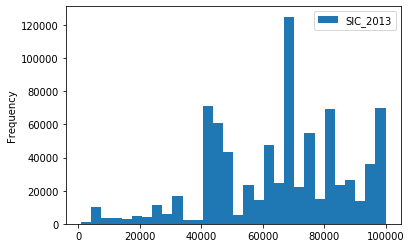

In [23]:
pop_3 = df[['incorporationdate','SIC_2013']]
hist = pop_3.plot.hist(bins=30)

In [3]:
df['population_log'] = np.log(df['population'])
df

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,latitude,longitude,oa11cd,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,population_log
0,AB10 1BA,2008-12-08,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,08/12/2008,82990,82990,82990,...,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,12.313998
1,AB10 1BA,2006-06-13,Private Limited Company,Active,Private Limited Company,Active,13/06/2006,58142,58142,58142,...,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,12.313998
2,AB10 1BA,2005-01-19,Private Limited Company,Active,Private Limited Company,Active,19/01/2005,58142,58142,58142,...,57.148832,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,12.313998
3,AB10 1BD,1994-07-27,Private Limited Company,Active,Private Limited Company,Active,27/07/1994,68100,68100,68100,...,57.147352,-2.096481,S00088986,S01006586,S02001249,City Centre West - 05,City Centre West,Aberdeen City,2696.0,12.313998
4,AB10 1DQ,2007-10-03,Private Limited Company,Active,Private Limited Company,Active,03/10/2007,82990,82990,82990,...,57.144925,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998
5,AB10 1DQ,1983-06-09,Private Limited Company,Active,Private Limited Company,Active,09/06/1983,93199,93199,93199,...,57.144925,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998
6,AB10 1DQ,2010-07-12,Private Limited Company,Active,Private Limited Company,Active,12/07/2010,82990,82990,82990,...,57.144925,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998
7,AB10 1DQ,2004-07-12,Private Limited Company,Active,Private Limited Company,Active,12/07/2004,55100,55100,55100,...,57.144925,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998
8,AB10 1DQ,2011-09-01,Private Limited Company,Active,Private Limited Company,Active,01/09/2011,56101,56101,56101,...,57.144925,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998
9,AB10 1DQ,1987-12-14,Private Limited Company,Active,Private Limited Company,Active,14/12/1987,82990,82990,82990,...,57.144925,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998


In [26]:
df[['population','population_log']]

,population,population_log
0,12.313998,2.510737
1,12.313998,2.510737
2,12.313998,2.510737
3,12.313998,2.510737
4,12.313998,2.510737
5,12.313998,2.510737
6,12.313998,2.510737
7,12.313998,2.510737
8,12.313998,2.510737
9,12.313998,2.510737


In [4]:
df.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC_2013                               int64
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd  

In [5]:
df['SIC2013_log'] = np.log2(df['SIC_2013'])

In [28]:
df[['SIC2013_log','SIC_2013']]

,SIC2013_log,SIC_2013
0,16.340650,82990
1,15.827293,58142
2,15.827293,58142
3,16.055367,68100
4,16.340650,82990
5,16.508027,93199
6,16.340650,82990
7,15.749765,55100
8,15.775739,56101
9,16.340650,82990


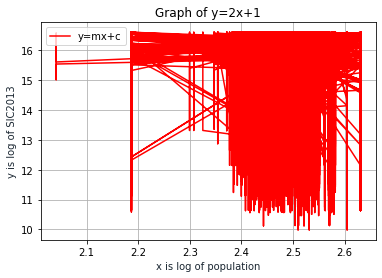

In [30]:

x = df['population_log']
y = df['SIC2013_log']
plt.plot(x, y, '-r', label='y=mx+c')
plt.title('Graph of y=2x+1')
plt.xlabel('x is log of population', color='#1C2833')
plt.ylabel('y is log of SIC2013', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

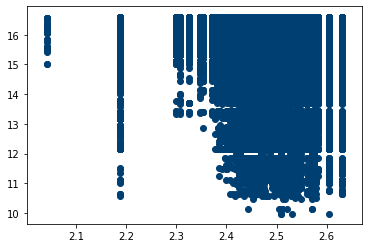

In [31]:
plt.scatter(x,y,color='#003F72')

In [6]:
# Digital technologies
sic_digital = [26110,26120,26200,26400,26511,26512,26800,33130,
                58210,58290,62011,62012,62020,62030,62090,63110,
                63120,95110]
# Life Sciences and healthcare
sic_science = [21100,21200,26600,26701,32500,72110,75000,86101,
                86102,86210,86220,86230,86900]
# Publishing and broadcasting
sic_publishing = [26301,26309,26702,58110,58120,58130,58141,58142,
                   58190,59111,59112,59113,59120,59131,59132,59133,
                   59140,59200,60100,60200,61100,61200, 61300,61900,
                   63910,63990,73110,73120,73200,74100,74201,74202,
                   74203,74209,95120]
# Other scientific activities of manufacturing
sic_otherScManuf = [19201,19209,20110,20120,20130,95210,95220,95250,
                     20140,20150,20160,20170,20200,20301,20302,20411,
                     20412,20420,20510,20520,20530,20590,20600,25210,
                     25300,25400,26513,26514,26520,27110,27120,27200,
                     27310,27320,27330,27400,27510,27520,27900,28110,
                     28120,28131,28132,28140,28150,28210,28220,28230,
                     28240,28250,28290,28301,28302,28410,28490,28910,
                     28921,28922,28923,28930,28940,28950,28960,28990,
                     29100,29201,29202,29203,29310,29320,30110,30120,
                     30200,30300,30400,30910,30920,30990,32120,32401,
                     33120,33140,33150,33160,33170]
# Other scientific activity services
sic_otherScServices = [51101,51102,51210,51220,71111,71112,71121,71122,
                        71129,71200,72190,72200,74901,74902,85410,85421,
                        85422]
# Food and accomodation
sic_food = [55100,55201,55202,55209,55300, 56101,56102,56103,
             56210,56290,56301,56302]
# Entertainment
sic_entertainment = [59140, 82301,82302, 90010,91011,91012,91020,91030,
                      91040,92000,93110, 93120,93130,93191,93199, 93020]
# Retail except retail trade of motor vehicles
sic_retail = [47190,47990,47290,47789,47782,47810,47890,47820,
               47781,47110,47791,47430,47300,47250,47610,47240,
               47530,47710,47410,47750,47540,47230,47760,47721,
               47210,47599,47650,47520,47741,47722,47220,47749,
               47421,47630,47591,47620,47799,47640,47429,47510,
               47260,47770,47910]

In [7]:
sic13=df.set_index("SIC_2013")
sic13.head()

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC2018,SICcombine,population,...,longitude,oa11cd,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,population_log,SIC2013_log
SIC_2013,,,,,,,,,,,,,,,,,,,,,
82990,AB10 1BA,2008-12-08,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,08/12/2008,82990,82990,222793,...,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,12.313998,16.340650
58142,AB10 1BA,2006-06-13,Private Limited Company,Active,Private Limited Company,Active,13/06/2006,58142,58142,222793,...,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,12.313998,15.827293
58142,AB10 1BA,2005-01-19,Private Limited Company,Active,Private Limited Company,Active,19/01/2005,58142,58142,222793,...,-2.098451,S00090540,S01006646,S02001261,George Street - 02,George Street,Aberdeen City,2688.0,12.313998,15.827293
68100,AB10 1BD,1994-07-27,Private Limited Company,Active,Private Limited Company,Active,27/07/1994,68100,68100,222793,...,-2.096481,S00088986,S01006586,S02001249,City Centre West - 05,City Centre West,Aberdeen City,2696.0,12.313998,16.055367
82990,AB10 1DQ,2007-10-03,Private Limited Company,Active,Private Limited Company,Active,03/10/2007,82990,82990,222793,...,-2.108554,S00088978,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,12.313998,16.340650


In [10]:
sic13.loc[[26110]]

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC2018,SICcombine,population,...,Density,latitude,longitude,oa11cd,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID
SIC_2013,,,,,,,,,,,,,,,,,,,,,
26110,AB12 4YD,1979-08-24,Private Limited Company,Active,Private Limited Company,Active,24/08/1979,26110,26110,252973,...,0.4,57.069913,-2.162112,S00091311,S01006848,S02001295,Banchory-Devenick and Findon - 01,Banchory-Devenick and Findon,Aberdeenshire,5135.0
26110,B3 2HJ,2004-09-02,Private Limited Company,Active,Private Limited Company,Active,02/09/2004,26110,26110,1073045,...,40.1,52.481943,-1.900741,E00175652,E01033620,E02006899,Birmingham 138A,Birmingham 138,Birmingham,67411.0
26110,B3 2HJ,1996-09-20,Private Limited Company,Active,Private Limited Company,Active,20/09/1996,26110,26110,1073045,...,40.1,52.481943,-1.900741,E00175652,E01033620,E02006899,Birmingham 138A,Birmingham 138,Birmingham,67411.0
26110,B3 2HJ,2007-01-08,Private Limited Company,Active,Private Limited Company,Active,08/01/2007,26110,26110,1073045,...,40.1,52.481943,-1.900741,E00175652,E01033620,E02006899,Birmingham 138A,Birmingham 138,Birmingham,67411.0
26110,B30 3JN,1997-03-24,Private Limited Company,Active,Private Limited Company,Active,24/03/1997,26110,26110,1073045,...,40.1,52.415206,-1.918195,E00045572,E01008977,E02001949,Birmingham 123A,Birmingham 123,Birmingham,68605.0
26110,B6 7EE,1992-02-04,Private Limited Company,Active,Private Limited Company,Active,04/02/1992,26110,26110,1073045,...,40.1,52.510706,-1.876748,E00045214,E01008899,E02001863,Birmingham 037A,Birmingham 037,Birmingham,82241.0
26110,B76 1AL,1947-06-26,Private Limited Company,Active,Private Limited Company,Active,26/06/1947,26110,26110,1073045,...,40.1,52.529322,-1.791112,E00047848,E01009442,E02001847,Birmingham 021C,Birmingham 021,Birmingham,96675.0
26110,B77 5HH,2010-10-14,Private Limited Company,Active,Private Limited Company,Active,14/10/2010,26110,26110,76813,...,24.9,52.599297,-1.675073,E00168407,E01032901,E02006226,Tamworth 010F,Tamworth 010,Tamworth,98941.0
26110,B98 0RF,1976-06-24,Private Limited Company,Active,Private Limited Company,Active,24/06/1976,26110,26110,84214,...,15.5,52.310034,-1.889127,E00164605,E01032275,E02006725,Redditch 005B,Redditch 005,Redditch,109398.0


In [9]:
sic_d13= sic13.loc[[26110,26120,26200,26400,26511,26512,26800,33130,
                58210,58290,62011,62012,62020,62030,62090,63110,
                63120,95110]]

In [10]:
sic_d13.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd                              object
lsoa11nm  

In [19]:
sic_d13.shape

(47430, 28)

In [21]:
sic_d13[['population_log','SIC2013_log']]

,population_log,SIC2013_log
SIC_2013,,
26110,12.441038,14.672315
26110,13.886011,14.672315
26110,13.886011,14.672315
26110,13.886011,14.672315
26110,13.886011,14.672315
26110,13.886011,14.672315
26110,13.886011,14.672315
26110,11.249129,14.672315
26110,11.341116,14.672315


In [24]:
sns.set(color_codes=True)


ValueError: Input passed into argument "'y1'"is not 1-dimensional.

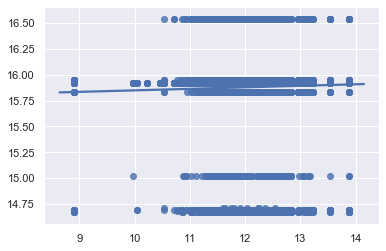

In [27]:
x = sic_d13[['population_log']]
y = sic_d13[['SIC2013_log']]
sns.regplot(x, y)

KeyError: "None of [Int64Index([12, 13, 13, 13, 13, 13, 13, 11, 11, 12,\n            ...\n            11, 11, 11, 11, 12, 11, 11, 12, 12, 11],\n           dtype='int64', length=47430)] are in the [columns]"

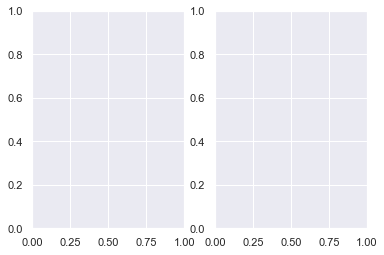

In [51]:

# ========================
# Plot the data
# ========================
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot the original data and model
x = sic_d13['population_log']
y = sic_d13['SIC2013_log']
sic_d13.plot(kind='scatter', color='Blue',x= sic_d13['population_log'],y= sic_d13['SIC2013_log'], ax=axes[0], title='Original Values')
sic_d13.plot(kind='line', color='Red',x= sic_d13['population_log'],y= sic_d13['SIC2013_log'], ax=axes[0])
 
# Plot the log transformed data and model
#data_log.plot(kind='scatter', color='Blue', x='length', y='weight', ax=axes[1], title='Log Values')
#lm_log_plot.plot(kind='line', color='Red', x='length', y='weight', ax=axes[1])
 
plt.show()

In [45]:
sic_d13.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd                              object
lsoa11nm  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


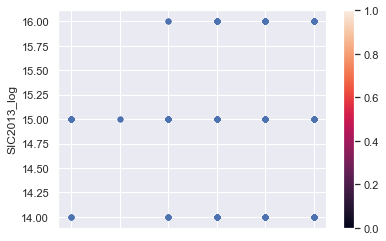

In [53]:
sic_d13.plot.scatter(x='population_log',y='SIC2013_log',colormap='viridis')

In [11]:
sic_d13["population_log"] = sic_d13['population_log'].astype('int')
sic_d13.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd                              object
lsoa11nm  

In [54]:
sic_d13.to_csv('sic_digital_2013.csv',index=True)

In [12]:
sic_d13["SIC2013_log"] = sic_d13['SIC2013_log'].astype('int')
sic_d13.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd                              object
lsoa11nm  

In [13]:
sic_d13.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd                              object
lsoa11nm  

In [15]:
sic_d13[['population_log','SIC2013_log']]

,population_log,SIC2013_log
SIC_2013,,
26110,12,14
26110,13,14
26110,13,14
26110,13,14
26110,13,14
26110,13,14
26110,13,14
26110,11,14
26110,11,14


In [33]:
x = sic_d13['population_log']
y = sic_d13['SIC2013_log']

In [17]:
# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SIC2013_log   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.277e+07
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        06:00:42   Log-Likelihood:                -62892.
No. Observations:               47430   AIC:                         1.258e+05
Df Residuals:                   47429   BIC:                         1.258e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
population_log     1.2884      0.000   3572.899      0.000       1.288       1.289
==============================================================================
Omnibus:                     5182.038   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20931.151
Skew:                           0.494   Prob(JB):                         0.00
Kurtosis:                       6.101   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(predictions, "popolation_log", fig=fig)

AttributeError: 'Series' object has no attribute 'model'

<Figure size 864x576 with 0 Axes>

Pearson correlation :  0.03252142065074376


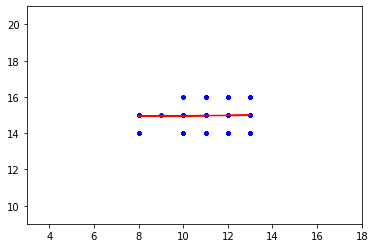

In [84]:
x = sic_d13['population_log']
y = sic_d13['SIC2013_log']

# The following function computes the best fitting regression line and basic statistics.
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y) 

plt.plot(x,y,'b.') # Plot the data.
plt.plot(x, x*slope + intercept, 'r') # Plot the regression line. 

plt.xlim([min(x)-5,max(x)+5]) 
plt.ylim([min(y)-5,max(y)+5]) 

corr_coeff = pearsonr(x,y)[0]

print ("Pearson correlation : ", corr_coeff)


Spearman correlation :  0.035405139911664656


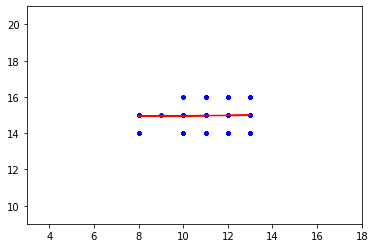

In [86]:
x = sic_d13['population_log']
y = sic_d13['SIC2013_log']

# The following function computes the best fitting regression line and basic statistics.
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y) 

plt.plot(x,y,'b.') # Plot the data.
plt.plot(x, x*slope + intercept, 'r') # Plot the regression line. 

plt.xlim([min(x)-5,max(x)+5]) 
plt.ylim([min(y)-5,max(y)+5])
# SWITCH TO SPEARMAN:

# We will need to store the correlation to check who has won:
corr_coeff = spearmanr(x,y)[0]

print ("Spearman correlation : ", corr_coeff)

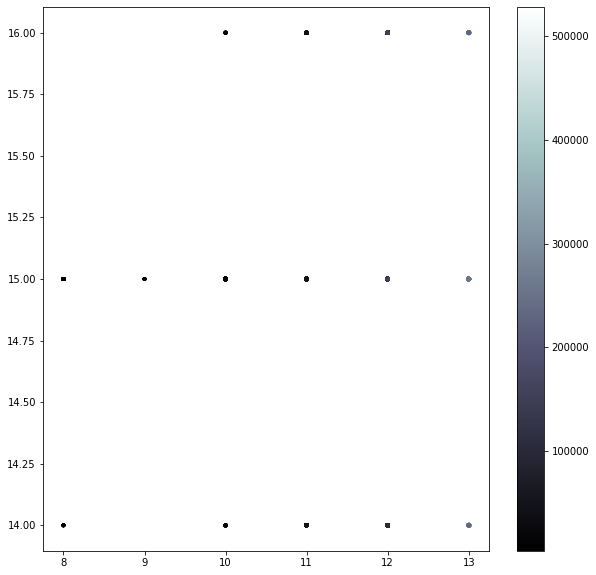

In [80]:
fig2 = plt.figure(2,figsize=(10,10))
x = sic_d13['population_log']
y = sic_d13['SIC2013_log']
z = sic_d13['Males']
plt.scatter(x,y,s=x,c=z,cmap = 'bone',vmin=None,vmax=None)
plt.colorbar()

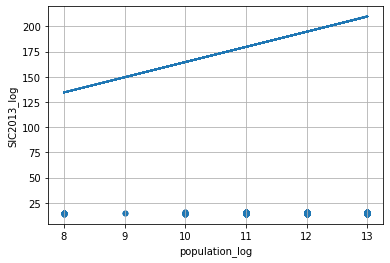

In [46]:
# scatter-plot data
ax = sic_d13.plot(x='population_log', y='SIC2013_log', kind='scatter',grid=True)

# plot regression line on the same axes, set x-axis limits
ax.plot(x, predictions + predictions * x)

#a= graphics.plot_fit(predictions,'SIC2013_log')

In [18]:
x = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)

# Print out the statistics
model.summary()

/Users/jyothigupta/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SIC2013_log   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     50.21
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.40e-12
Time:                        06:03:31   Log-Likelihood:                 5064.8
No. Observations:               47430   AIC:                        -1.013e+04
Df Residuals:                   47428   BIC:                        -1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.8573      0.017    886.199      0.000      14.824      14.890
population_log     0.0102      0.001      7.086      0.000       0.007       0.013
==============================================================================
Omnibus:                    24868.906   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           628848.870
Skew:                          -2.004   Prob(JB):                         0.00
Kurtosis:                      20.382   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

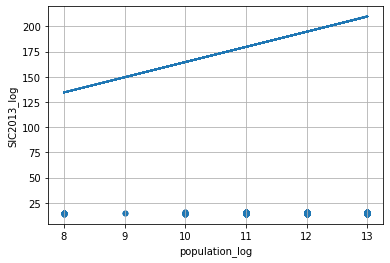

In [50]:
# scatter-plot data
ax = sic_d13.plot(x='population_log', y='SIC2013_log', kind='scatter',grid=True)

# plot regression line on the same axes, set x-axis limits
ax.plot(x, predictions + predictions * x)

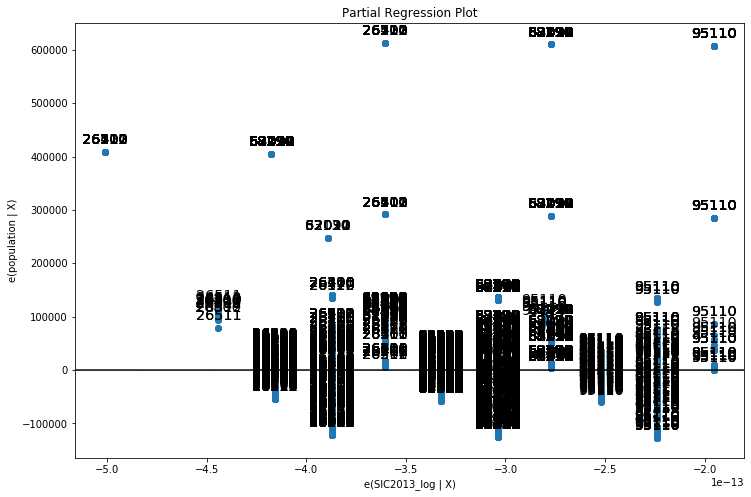

In [63]:
#fig, test = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("population", "SIC2013_log", ["SIC2013_log", "population_log"], data=sic_d13, ax=ax)

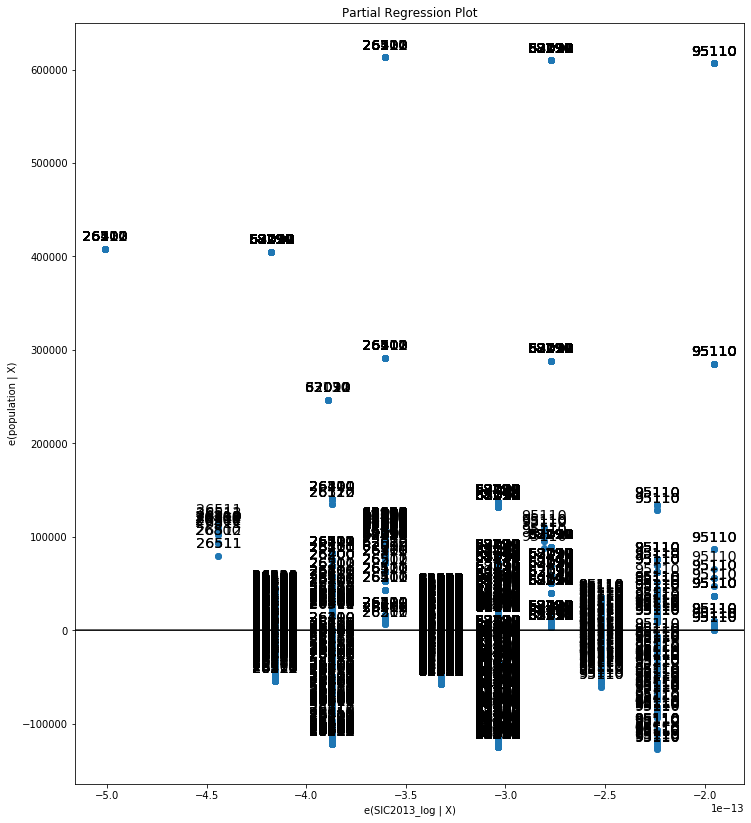

In [64]:
#fig, test = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress("population", "SIC2013_log", ["SIC2013_log", "population_log"], data=sic_d13, ax=ax)

In [71]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(predictions, fig=fig)

AttributeError: 'numpy.ndarray' object has no attribute 'model'

<Figure size 864x576 with 0 Axes>

AttributeError: 'numpy.ndarray' object has no attribute 'model'

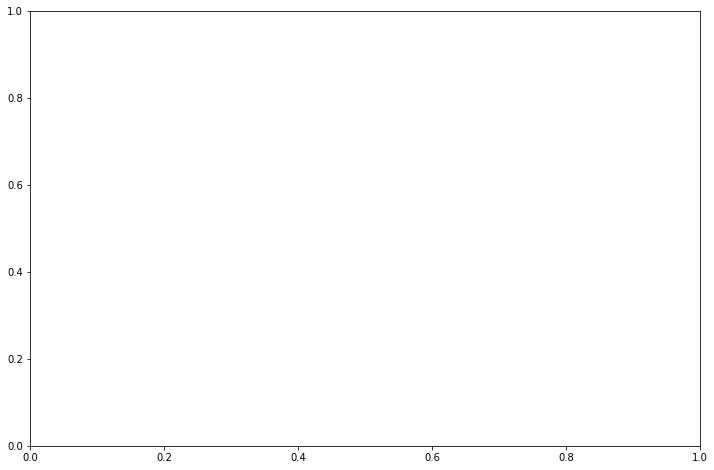

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(predictions, "population_log", ax=ax)

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

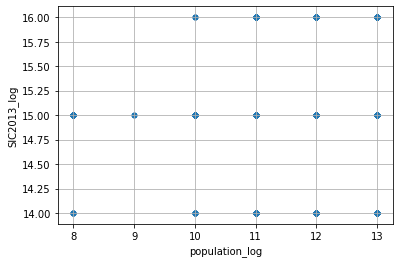

In [52]:
# scatter-plot data
ax = sic_d13.plot(x='population_log', y='SIC2013_log', kind='scatter',grid=True)

abline_plot(model_results=model.fit(), ax=ax)

In [21]:
#x = sic_d13
x = sic_d13[['population_log','population']]
y = sic_d13['SIC2013_log']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SIC2013_log   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.339e+07
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        06:13:44   Log-Likelihood:                -45360.
No. Observations:               47430   AIC:                         9.072e+04
Df Residuals:                   47428   BIC:                         9.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
population_log     1.3787      0.000   2944.511      0.000       1.378       1.380
population     -4.644e-06   2.04e-08   -227.829      0.000   -4.68e-06    -4.6e-06
==============================================================================
Omnibus:                    19635.470   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198296.400
Skew:                           1.716   Prob(JB):                         0.00
Kurtosis:                      12.410   Cond. No.                     4.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#x = sic_d13
x = sic_d13[['population_log','population']]
y = sic_d13['SIC2013_log']
lm = linear_model.LinearRegression()
model = lm.fit(x,y)


In [25]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [27]:
predictions = lm.predict(x)
print(predictions)

[14.97950911 15.00042713 15.00042713 ... 14.97945137 14.98084769
 14.96931457]


In [28]:
lm.score(x,y)

0.0011089408035045434

In [29]:
lm.coef_

array([7.40014370e-03, 1.64837706e-08])

In [30]:
lm.intercept_

14.886537436251604

In [31]:
lm.rank_

2

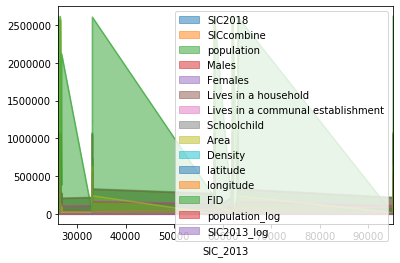

In [87]:
sic_d13.plot.area(stacked=False)

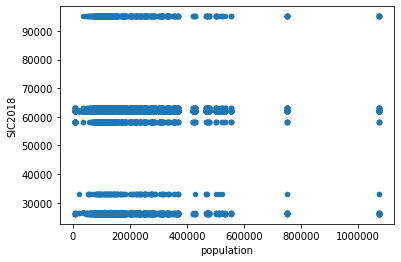

In [96]:
sic_d13.plot.scatter(x='population', y='SIC2018');

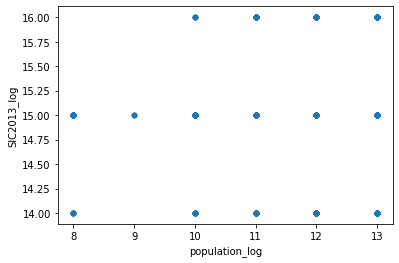

In [94]:
sic_d13.plot.scatter(x='population_log', y='SIC2013_log');

In [104]:
sic_d13.plot.scatter(x='SIC2013_log', y='companystatus', s=sic_d13['population'] * 200);

ValueError: scatter requires y column to be numeric

In [91]:
sic_d13.dtypes

postcode                              object
incorporationdate                     object
companycategory                       object
companystatus                         object
CompanyCategory                       object
CompanyStatus                         object
IncorporationDate                     object
SIC2018                                int64
SICcombine                             int64
population                             int64
Males                                  int64
Females                                int64
Lives in a household                 float64
Lives in a communal establishment    float64
Schoolchild                          float64
Area                                 float64
Density                              float64
latitude                             float64
longitude                            float64
oa11cd                                object
lsoa11cd                              object
msoa11cd                              object
lsoa11nm  

In [102]:
sic_d13.head(2)

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC2018,SICcombine,population,...,longitude,oa11cd,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,population_log,SIC2013_log
SIC_2013,,,,,,,,,,,,,,,,,,,,,
26110,AB12 4YD,1979-08-24,Private Limited Company,Active,Private Limited Company,Active,24/08/1979,26110,26110,252973,...,-2.162112,S00091311,S01006848,S02001295,Banchory-Devenick and Findon - 01,Banchory-Devenick and Findon,Aberdeenshire,5135.0,12,14
26110,B3 2HJ,2004-09-02,Private Limited Company,Active,Private Limited Company,Active,02/09/2004,26110,26110,1073045,...,-1.900741,E00175652,E01033620,E02006899,Birmingham 138A,Birmingham 138,Birmingham,67411.0,13,14


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126b59f60>,
      dtype=object)

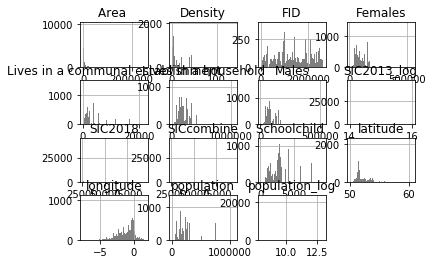

In [107]:
sic_d13.hist(color='k', alpha=0.5, bins=500)

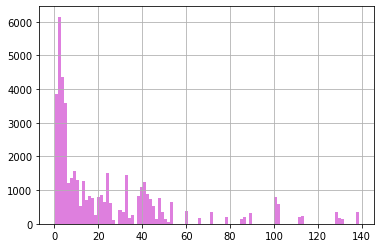

In [114]:
sic_d13['Density'].hist(color='m', alpha=0.5, bins=100)

In [ ]:
sic_d13.plot.bar(stacked=True);

In [ ]:
sic_d13.plot.barh(stacked=True);

In [ ]:
df.plot.hist(orientation='horizontal', cumulative=True)